In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

dt = pd.read_excel('/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/GII_SDG.xlsx',thousands=',')
dt.head(3)

,Economy,GDP,GII,SDG,GDP per capita PPP,GHG,Fossil CO2 emissions by country (in million tonnes of carbon per year)
0,Albania,3.3,25.4,75.028501,18037.01,7.673672,1.404006
1,Algeria,4.2,16.1,70.473072,15227.46,256.792131,48.617020
2,Angola,0.5,10.3,51.929351,8716.48,67.700756,5.671545


In [ ]:
dt.shape

(129, 7)

In [ ]:
dt.columns

Index(['Economy ', 'GDP', 'GII', 'SDG', 'GDP per capita PPP', 'GHG',
       'Fossil CO2 emissions by country (in million tonnes of carbon per year)'],
      dtype='object')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Economy                                                                 129 non-null    object 
 1   GDP                                                                     129 non-null    float64
 2   GII                                                                     129 non-null    float64
 3   SDG                                                                     129 non-null    float64
 4   GDP per capita PPP                                                      129 non-null    float64
 5   GHG                                                                     129 non-null    float64
 6   Fossil CO2 emissions by country (in million tonnes of carbon per year)  129 non-nul

In [ ]:
dt.columns = ['Economy','GDP','GII','SDG','GDP_per_capita','GHG','Fossil_CO2_emissions']
dt.head(3)

,Economy,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
0,Albania,3.3,25.4,75.028501,18037.01,7.673672,1.404006
1,Algeria,4.2,16.1,70.473072,15227.46,256.792131,48.617020
2,Angola,0.5,10.3,51.929351,8716.48,67.700756,5.671545


In [ ]:
dt.describe().round(2)

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,129.00,129.00,129.00,129.00,129.00,129.00
mean,2.81,32.47,70.31,30493.39,385.89,75.45
std,2.45,14.31,8.68,27233.21,1546.98,318.65
min,-3.20,10.30,49.86,873.89,1.23,0.15
25%,1.00,21.20,63.98,9220.60,28.63,2.26
50%,2.60,29.40,70.85,21848.73,56.83,8.93
75%,4.70,42.00,77.33,46311.87,256.15,35.08
max,8.70,67.60,86.35,133976.91,15943.99,3248.50


In [ ]:
dt['Economy'] = dt['Economy'].str.replace(u'\xa0', '', regex=True).str.strip()

In [ ]:
import pandas as pd
import geopandas as gpd

world = gpd.read_file("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/world_countries/World_Countries_Generalized.shp")
world.columns = ['Economy','ISO','COUNTRYAFF','AFF_ISO','geometry']

In [ ]:
merge = world.merge(dt, on='Economy', how='left')

In [ ]:
lim = merge.total_bounds

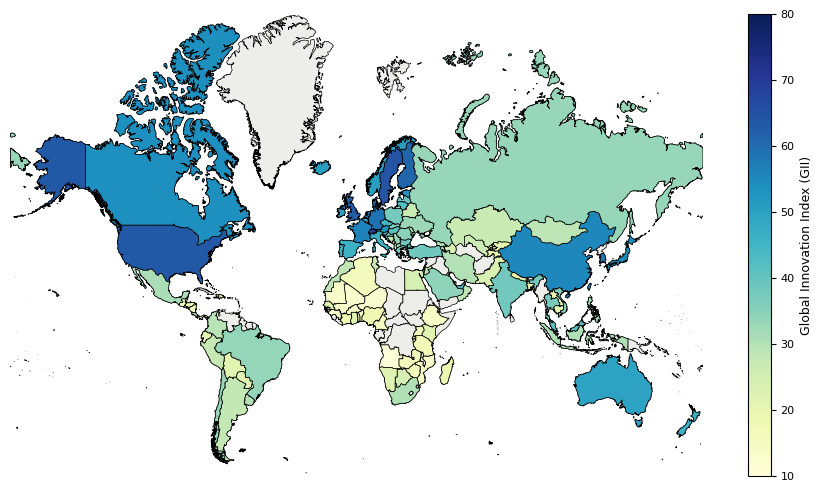

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 6))
merge.plot(ax=ax, color='#edede9', edgecolor='black', linewidth=0.5)
gii_plot = merge.plot(column='GII', ax=ax, legend=True, cmap='YlGnBu', edgecolor='black',
           linewidth=0.5, vmin=10, vmax=80)#color='none'
plt.subplots_adjust(right=0.53)
colorbar = gii_plot.get_figure().get_axes()[1]
colorbar.set_ylabel("Global Innovation Index (GII)", fontsize=9)
colorbar.tick_params(labelsize=8)

plt.xlim([lim[0]-30000, lim[2]+3000])
plt.ylim([lim[1]+22000000, lim[3]+80000])

plt.axis('off')

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/GII.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/GII.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

Variável principal

*   `Economy`: Nome dos países.
*   `GDP`: Produto Interno Bruto (Gross Domestic Product).
*   **`GII`**: **Índice de Innovación Global (Global Innovation Index).**
*   `SDG`: Objetivos de Desenvolvimento Sustentável (Sustainable Development Goals).
*   `GDP_per_capita`: Produto Interno Bruto per capita PPP.
*   `GHG`: Emisión de Gases de Efecto Invernadero.
*   `Fossil_CO2_emissions`: Emissões de CO2 fóssil por país



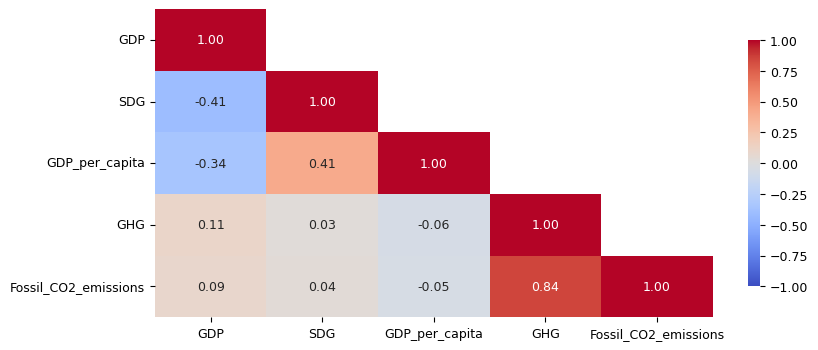

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlacao1 = dt.drop(columns=['Economy','GII']).corr()
mask = np.triu(np.ones_like(correlacao1, dtype=bool), k=1)

plt.figure(figsize=(9, 4))
plt.rcParams.update({'font.size': 9})
sns.heatmap(correlacao1, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,  mask=mask, cbar_kws={"shrink": .8})

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/corr.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/corr.pdf", dpi=800, bbox_inches='tight',pad_inches=0)

plt.show()

**GHG (Emisión de Gases de Efecto Invernadero):** Abrange todos os gases que contribuem para as mudanças climáticas ao reter calor na atmosfera. Isso inclui o dióxido de carbono (CO₂), metano (CH₄), óxidos de nitrogênio (NOₓ), ozônio (O₃), entre outros. A medição das emissões de GEE é mais ampla e inclui todos esses gases, não apenas o CO₂.

**Fossil_CO2_emissions (Emisiones de CO₂ fósil):** Se refere especificamente às emissões de dióxido de carbono (CO₂) provenientes da queima de combustíveis fósseis, como carvão, petróleo e gás natural. Nesse caso, está sendo considerado apenas o CO₂, que é um importante gás de efeito estufa, mas apenas uma parte das emissões de GHG.

In [ ]:
X = dt.drop(columns=['Economy','GII','Fossil_CO2_emissions'])
X_ = dt.drop(columns=['Economy','GII','Fossil_CO2_emissions'])
y = dt['GII']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

X = scaler.transform(X)

In [ ]:
pip install --upgrade linear-tree

In [ ]:
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

m5 = LinearTreeRegressor(base_estimator=LinearRegression(), criterion='mse')
m5.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

**Importância das variáveis:**

In [ ]:
m5.feature_importances_

array([0.        , 0.4441096 , 0.45754564, 0.09834476])

In [ ]:
col_names = X_.columns
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

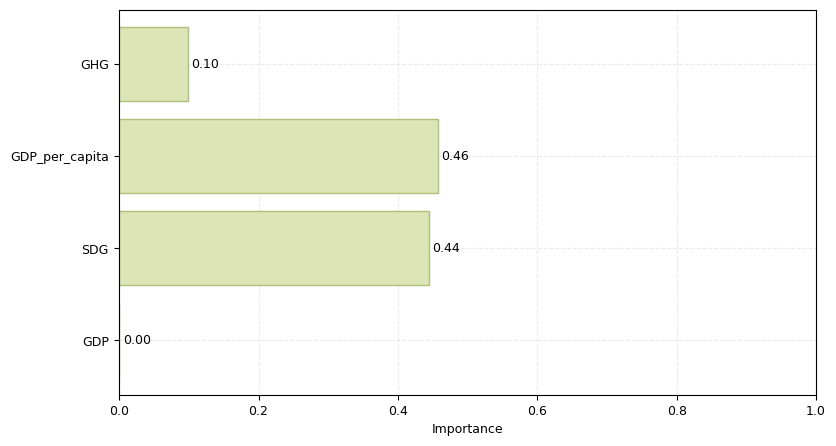

In [ ]:
plt.figure(figsize=(9, 5))
plt.rcParams.update({'font.size': 9})
#
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.barh(col_names,
         m5.feature_importances_, color='#dde5b6',
         edgecolor="#adc178", zorder = 3)
plt.xlabel('Importance')
for index, value in enumerate(m5.feature_importances_):
    plt.text(value+0.005, index, f'{value:.2f}', va='center', ha='left')
plt.xlim(-0.0008, 1)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_zorder(4)

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/Importance.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/Importance.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

A análise de importância das variáveis indica um quadro interessante sobre como diferentes fatores podem influenciar (ou não) o Índice de Inovação Global (GII). No caso, a análise sugere que, enquanto algumas variáveis têm uma contribuição significativa para a predição do GII, outras parecem não desempenhar um papel relevante.

*   **GDP (Produto Interno Bruto):** O valor de 0.00 sugere que **<font color='#05668d'>não tem um impacto direto significativo sobre o Índice de Inovação Global (GII)</font>**. O GII pode estar mais relacionado a fatores como educação, infraestrutura de pesquisa ou políticas públicas voltadas para a inovação, que não são capturados diretamente pelo PIB total.


*   **GHG (Emissões de Gases de Efeito Invernadero):** Possui uma importância de 0.10, o que indica que, embora as emissões de gases de efeito estufa **<font color='#05668d'>exerçam um impacto moderado, elas não são um fator decisivo no Índice de Inovação Global (GII)</font>**. ugere que, atualmente, as políticas ambientais e as tecnologias voltadas para a redução das emissões não têm um efeito direto significativo sobre o GII. No entanto, há um potencial para que o impacto do GHG no GII se intensifique à medida que um número crescente de países adote tecnologias limpas e sustentáveis.

*   **SDG (Objetivos de Desenvolvimento Sustentável):** Com uma importância de 0.44, **<font color='#05668d'>apresenta um impacto moderado no Índice de Inovação Global (GII)</font>**. Este resultado pode indicar que países que se alinham aos SDG  tendem a promover ambientes mais favoráveis à inovação. Este resultado reflete a ideia de que políticas sustentáveis podem promover um ambiente mais favorável ao desenvolvimento de novas tecnologias e soluções.

*   **GDP_per_capita (Produto Interno Bruto per capita PPP):** O valor de 0.46 indica que é a variável **<font color='#05668d'>com maior importância, sugerindo que o nível de desenvolvimento econômico per capita tem uma forte correlação com a capacidade de um país inovar.</font>** O aumento no GDP_per_capita pode indicar um maior acesso a recursos, maior investimento em pesquisa e desenvolvimento e uma infraestrutura mais robusta, fatores que contribuem diretamente para a inovação.


In [ ]:
from sklearn.metrics import r2_score

y_pred = m5.predict(X)

r2 = r2_score(y, y_pred)
r2

0.9052465608319508

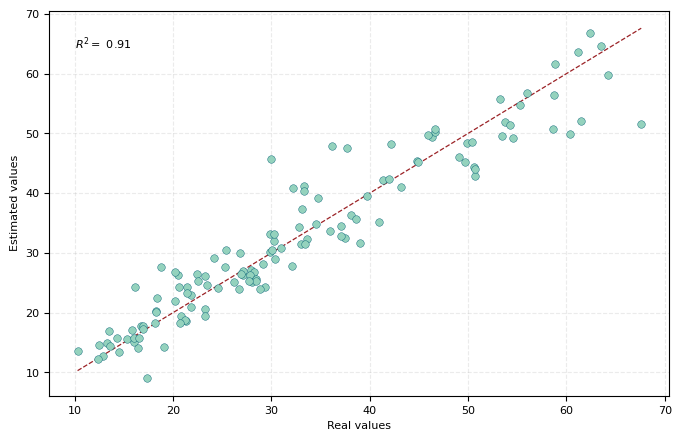

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y), max(y)], [min(y), max(y)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 2)
plt.scatter(y, y_pred, s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 3)
plt.text(10, 65, r'$R^{2} =$ '+f'{r2:.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

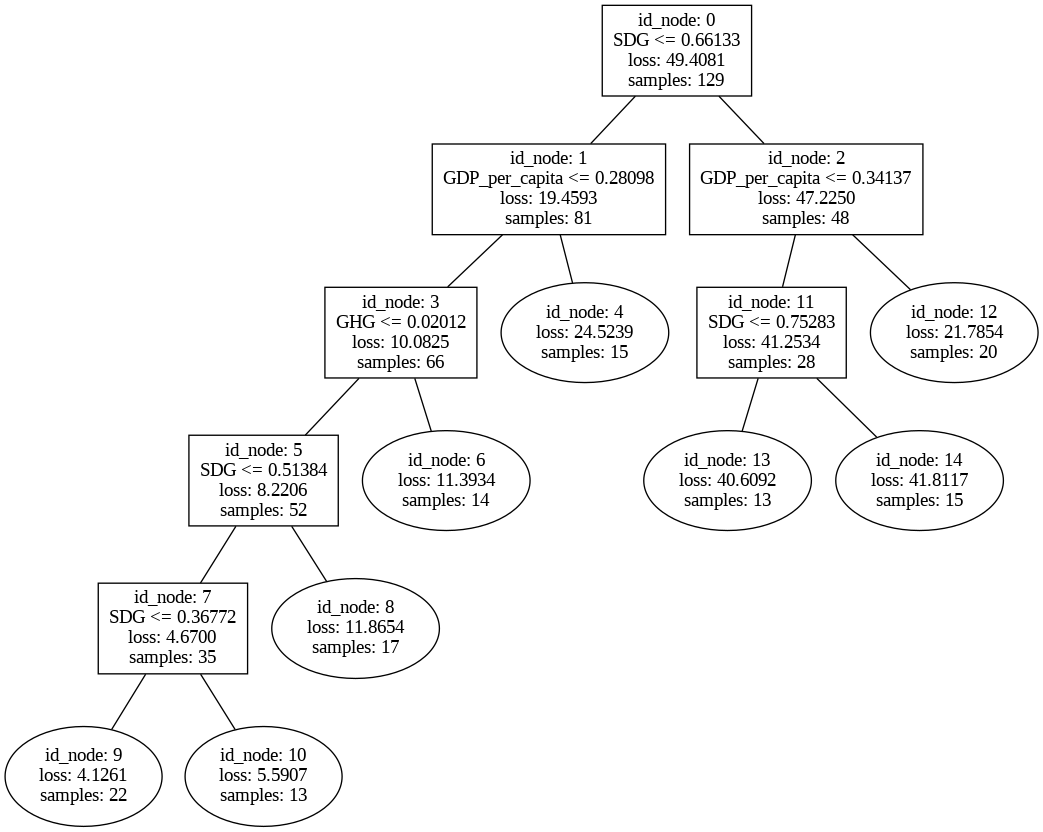

In [ ]:
#m5.plot_model(feature_names=col_names)
m5.plot_model(feature_names=col_names)

In [ ]:
print(m5.model_to_dot(feature_names=col_names, max_depth=None))

graph linear_tree {
0 [label="id_node: 0\nSDG <= 0.66133\nloss: 49.4081\nsamples: 129", shape=rectangle];
1 [label="id_node: 1\nGDP_per_capita <= 0.28098\nloss: 19.4593\nsamples: 81", shape=rectangle];
2 [label="id_node: 2\nGDP_per_capita <= 0.34137\nloss: 47.2250\nsamples: 48", shape=rectangle];
3 [label="id_node: 3\nGHG <= 0.02012\nloss: 10.0825\nsamples: 66", shape=rectangle];
5 [label="id_node: 5\nSDG <= 0.51384\nloss: 8.2206\nsamples: 52", shape=rectangle];
7 [label="id_node: 7\nSDG <= 0.36772\nloss: 4.6700\nsamples: 35", shape=rectangle];
11 [label="id_node: 11\nSDG <= 0.75283\nloss: 41.2534\nsamples: 28", shape=rectangle];
9 [label="id_node: 9\nloss: 4.1261\nsamples: 22"];
10 [label="id_node: 10\nloss: 5.5907\nsamples: 13"];
8 [label="id_node: 8\nloss: 11.8654\nsamples: 17"];
6 [label="id_node: 6\nloss: 11.3934\nsamples: 14"];
4 [label="id_node: 4\nloss: 24.5239\nsamples: 15"];
13 [label="id_node: 13\nloss: 40.6092\nsamples: 13"];
14 [label="id_node: 14\nloss: 41.8117\nsamples: 

In [ ]:
condit = m5.summary(feature_names=col_names, only_leaves=False, max_depth=None)
condit

{0: {'col': 'SDG',
  'th': np.float64(0.66133),
  'loss': np.float64(49.40809),
  'samples': np.int64(129),
  'children': (1, 2),
  'models': (LinearRegression(), LinearRegression())},
 1: {'col': 'GDP_per_capita',
  'th': np.float64(0.28098),
  'loss': np.float64(19.4593),
  'samples': np.int64(81),
  'children': (3, 4),
  'models': (LinearRegression(), LinearRegression())},
 2: {'col': 'GDP_per_capita',
  'th': np.float64(0.34137),
  'loss': np.float64(47.22499),
  'samples': np.int64(48),
  'children': (11, 12),
  'models': (LinearRegression(), LinearRegression())},
 3: {'col': 'GHG',
  'th': np.float64(0.02012),
  'loss': np.float64(10.08255),
  'samples': np.int64(66),
  'children': (5, 6),
  'models': (LinearRegression(), LinearRegression())},
 5: {'col': 'SDG',
  'th': np.float64(0.51384),
  'loss': np.float64(8.22059),
  'samples': np.int64(52),
  'children': (7, 8),
  'models': (LinearRegression(), LinearRegression())},
 7: {'col': 'SDG',
  'th': np.float64(0.36772),
  'loss':

*   **`col`**: A característica (coluna) usada para dividir os dados nesse nó.

*   **`th`**: O limiar (threshold) para a divisão.

*   **`loss`**: A perda (loss) associada a esse nó.

*   **`samples`**: O número de amostras que chegaram a esse nó.

*   **`children`**: Uma tupla com os nós filhos (nós para os quais o árvore se ramifica).

*   **`models`**: Os modelos de regressão linear aplicados nesse nó e nos seus filhos.

In [ ]:
leaf_ids = m5.apply(X)
pd.unique(leaf_ids)

array([13,  8,  9, 12,  4, 10, 14,  6])

In [ ]:
# Nó interno
no0 = condit[0]
no1 = condit[1]
no2 = condit[2]
no3 = condit[3]
no5 = condit[5]
no7 = condit[7]
no11 = condit[11]

# Nó folha
nof4 = condit[4]
nof6 = condit[6]
nof8 = condit[8]
nof9 = condit[9]
nof10 = condit[10]
nof12 = condit[12]
nof13 = condit[13]
nof14 = condit[14]

## **Modelo da folha 4:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((1, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no1['th']       # GDP_per_capita

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 4\n----')
print(f"{no0['col']}: <= {no0['th']} ({val_[0, 1]})")
print(f"{no1['col']}: > {no1['th']} ({val_[0, 2]})")

Regras Modelo 4
----
SDG: <= 0.66133 (73.99079128346641)
GDP_per_capita: > 0.28098 (38273.17727862)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 4)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha4 = dt[idx]
dt_folha4_ = dt_folha4.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f4 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 4 — {len(X_leaf)} muestras")
print(ols_model_f4.summary())


📌 Hoja 4 — 15 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     15.63
Date:                Thu, 15 May 2025   Prob (F-statistic):           0.000265
Time:                        20:30:07   Log-Likelihood:                -45.281
No. Observations:                  15   AIC:                             100.6
Df Residuals:                      10   BIC:                             104.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3485     12

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f4 = ols_model_f4.rsquared
r2_f4

np.float64(0.8620937984839773)

In [ ]:
dt_folha4 = merge[merge['Economy'].isin(dt_folha4['Economy'].values)]

In [ ]:
pip install adjustText

In [ ]:
dt_folha4

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
17,Bahrain,BH,Bahrain,BH,"MULTIPOLYGON (((5631992.016 3017773.535, 56333...",2.6,29.1,63.561135,57213.09,63.733861,9.969095
34,Brunei Darussalam,BN,Brunei Darussalam,BN,"MULTIPOLYGON (((12803793.743 545661.391, 12800...",1.4,23.5,67.042459,78269.02,12.157943,3.212227
60,Cyprus,CY,Cyprus,CY,"POLYGON ((3703854.516 4124479.203, 3697723.804...",-0.4,46.3,72.920000,51023.63,10.324656,1.958030
110,Israel,IL,Israel,IL,"MULTIPOLYGON (((3937162.908 3623488.292, 39360...",2.0,54.3,73.530000,48484.58,79.578175,16.236216
120,Kuwait,KW,Kuwait,KW,"MULTIPOLYGON (((5283600.55 3373668.817, 528322...",-2.2,29.9,63.762258,45892.19,167.915769,27.083349
136,Mali,ML,Mali,ML,"POLYGON ((-1098191.027 1351946.666, -1103392.7...",4.5,12.9,56.805707,62334.64,45.463098,1.845434
155,Nepal,NP,Nepal,NP,"POLYGON ((9206244.369 3212599.832, 9201436.357...",0.8,18.8,67.072693,71709.28,56.830983,1.139248
165,North Macedonia,MK,North Macedonia,MK,"POLYGON ((2289725.504 5142205.376, 2292028.804...",1.0,33.0,73.801407,90241.11,11.370029,35.081799
176,Philippines,PH,Philippines,PH,"MULTIPOLYGON (((13346381.206 1781703.566, 1334...",5.6,32.2,67.472253,43969.55,256.147155,15.246625
181,Qatar,QA,Qatar,QA,"POLYGON ((5730130.293 2846479.698, 5725779.69 ...",1.6,33.4,64.933681,54103.32,154.383565,10.160518


In [ ]:
dt_folha4['Economy'].values

array(['Bahrain', 'Brunei Darussalam', 'Cyprus', 'Israel', 'Kuwait',
       'Mali', 'Nepal', 'North Macedonia', 'Philippines', 'Qatar',
       'Rwanda', 'Singapore', 'South Africa', 'Tanzania',
       'United Arab Emirates'], dtype=object)

In [ ]:
dt_folha4.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.260000,32.433333,66.354582,58347.494667,121.296184,40.624616
std,2.429815,13.803347,5.397033,14394.667382,139.130146,60.667497
min,-2.200000,12.900000,56.805707,39245.020000,7.493266,1.139248
25%,0.900000,22.050000,63.498189,48078.000000,28.810520,5.800868
50%,1.600000,30.400000,67.042459,54724.210000,74.290132,15.246625
75%,3.950000,38.300000,70.955000,67021.960000,161.149667,36.162704
max,6.900000,61.500000,73.801407,90241.110000,522.115491,200.929407


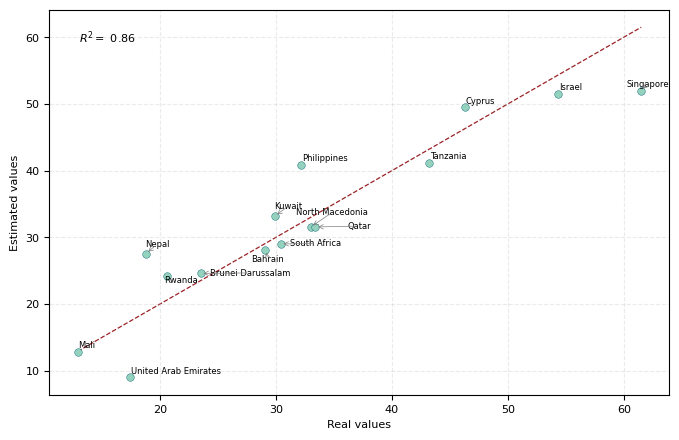

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f4.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(13, 60, r'$R^{2} =$ '+f'{ols_model_f4.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f4.predict(X_leaf)[i],
                    f'{dt_folha4["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f4.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f4.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 6:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((1, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no1['th']       # GDP_per_capita
val_norm[0, 3] = no3['th']       # GHG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 6\n----')
print(f"{no0['col']}: <= {no0['th']} ({val_[0, 1]})")
print(f"{no1['col']}: <= {no1['th']} ({val_[0, 2]})")
print(f"{no3['col']}: > {no3['th']} ({val_[0, 3]})")

Regras Modelo 6
----
SDG: <= 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.28098 (38273.17727862)
GHG: > 0.02012 (321.99974968210233)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 6)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha6 = dt[idx]
dt_folha6_ = dt_folha6.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f6 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 6 — {len(X_leaf)} muestras")
print(ols_model_f6.summary())


📌 Hoja 6 — 14 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     12.29
Date:                Thu, 15 May 2025   Prob (F-statistic):            0.00108
Time:                        20:30:17   Log-Likelihood:                -36.896
No. Observations:                  14   AIC:                             83.79
Df Residuals:                       9   BIC:                             86.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2964      6

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f6 = ols_model_f6.rsquared
r2_f6

np.float64(0.8452762873372812)

In [ ]:
dt_folha6 = merge[merge['Economy'].isin(dt_folha6['Economy'].values)]

In [ ]:
dt_folha6

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
31,Brazil,BR,Brazil,BR,"MULTIPOLYGON (((-4975425.634 -202388.509, -496...",2.9,33.6,73.778160,18968.42,1300.168867,132.770224
47,China,CN,China,CN,"MULTIPOLYGON (((12212148.916 2060710.579, 1220...",5.2,55.3,70.850000,22077.68,15943.986553,3248.499771
67,Egypt,EG,Egypt,EG,"POLYGON ((3577981.429 3644094.251, 3577530.16 ...",3.8,24.2,69.145194,18183.48,335.968049,73.418724
104,India,IN,India,IN,"MULTIPOLYGON (((7591744.401 2725002.975, 75929...",7.8,38.1,63.980000,9220.60,4133.554356,835.787252
105,Indonesia,ID,Indonesia,ID,"MULTIPOLYGON (((12206022.235 230861.234, 12204...",5.0,30.3,69.434735,14014.18,1200.199787,200.115702
106,Iran,IR,"Iran, Islamic Republic of",IR,"MULTIPOLYGON (((6768997.164 3762872.755, 67708...",4.7,30.1,68.956610,16811.47,996.752681,223.220498
134,Malaysia,MY,Malaysia,MY,"MULTIPOLYGON (((12701006.467 511563.728, 12707...",3.7,40.9,69.310000,2489.37,325.405848,78.827417
143,Mexico,MX,Mexico,MX,"MULTIPOLYGON (((-12418803.384 2805825.863, -12...",3.2,31.0,69.280551,16113.64,712.102098,131.720368
161,Nigeria,NG,Nigeria,NG,"MULTIPOLYGON (((1313507.213 814465.451, 130855...",2.9,18.4,54.580220,23172.66,385.112884,0.708961
169,Pakistan,PK,Pakistan,PK,"POLYGON ((7038779.958 3436076.707, 7074877.867...",-0.2,23.3,57.023561,35902.47,532.374484,21.427755


In [ ]:
dt_folha6['Economy'].values

array(['Brazil', 'China', 'Egypt', 'India', 'Indonesia', 'Iran',
       'Malaysia', 'Mexico', 'Nigeria', 'Pakistan', 'Russian Federation',
       'Saudi Arabia', 'Turkiye', 'Vietnam'], dtype=object)

In [ ]:
dt_folha6.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3.664286,33.400000,67.722922,14103.698571,2176.670462,360.747887
std,2.167454,8.905141,5.781722,9548.781470,4101.397772,858.204601
min,-0.800000,18.400000,54.580220,2489.370000,325.405848,0.420366
25%,2.975000,30.150000,65.924667,5539.720000,526.193719,12.069454
50%,3.750000,33.450000,69.295275,15063.910000,758.630103,85.091394
75%,4.925000,37.575000,70.752500,18772.185000,1275.176597,183.279333
max,7.800000,55.300000,73.778160,35902.470000,15943.986553,3248.499771


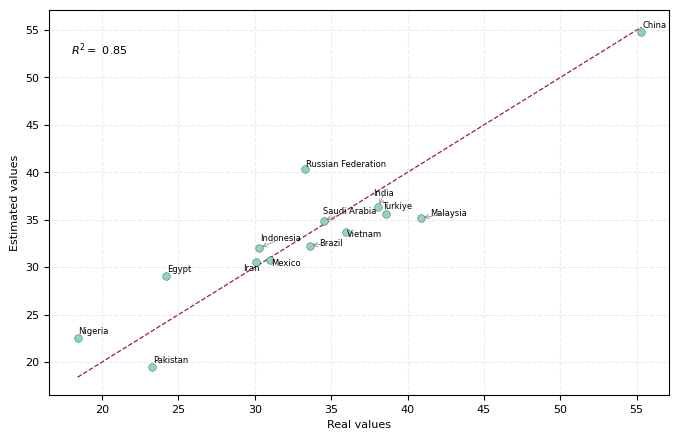

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f6.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(18, 53, r'$R^{2} =$ '+f'{ols_model_f6.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f6.predict(X_leaf)[i],
                    f'{dt_folha6["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f6.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f6.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 8:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((2, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no1['th']       # GDP_per_capita
val_norm[0, 3] = no3['th']       # GHG
val_norm[1, 1] = no5['th']       # SDG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 8\n----')
print(f"{no0['col']}: <= {no0['th']} ({val_[0, 1]})") #SDG
print(f"{no1['col']}: <= {no1['th']} ({val_[0, 2]})") #GDP_per_capita
print(f"{no3['col']}: <= {no3['th']} ({val_[0, 3]})") #GHG
print(f"{no5['col']}: > {no5['th']} ({val_[1, 1]})") #SDG

Regras Modelo 8
----
SDG: <= 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.28098 (38273.17727862)
GHG: <= 0.02012 (321.99974968210233)
SDG: > 0.51384 (68.6083845347094)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 8)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha8 = dt[idx]
dt_folha8_ = dt_folha8.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f8 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 8 — {len(X_leaf)} muestras")
print(ols_model_f8.summary())


📌 Hoja 8 — 17 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                 -0.213
Method:                 Least Squares   F-statistic:                    0.2988
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.873
Time:                        20:30:25   Log-Likelihood:                -45.148
No. Observations:                  17   AIC:                             100.3
Df Residuals:                      12   BIC:                             104.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2147     16

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f8 = ols_model_f8.rsquared
r2_f8

np.float64(0.09056704745694111)

In [ ]:
dt_folha8 = merge[merge['Economy'].isin(dt_folha8['Economy'].values)]

In [ ]:
dt_folha8

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
2,Algeria,DZ,Algeria,DZ,"POLYGON ((512443.03 4423494.247, 516027.527 44...",4.2,16.1,70.473072,15227.46,256.792131,48.617020
14,Azerbaijan,AZ,Azerbaijan,AZ,"MULTIPOLYGON (((5709878.269 4680908.765, 56881...",1.1,23.3,72.198912,21318.69,62.550294,11.991532
28,Bosnia and Herzegovina,BA,Bosnia and Herzegovina,BA,"POLYGON ((1964771.765 5295102.855, 1956832.69 ...",1.8,27.1,73.990661,18409.14,29.397991,5.507404
50,Colombia,CO,Colombia,CO,"MULTIPOLYGON (((-8333467.119 1246340.923, -833...",0.6,29.4,70.300794,18730.18,223.966634,28.722342
55,Costa Rica,CR,Costa Rica,CR,"POLYGON ((-9487402.975 1088082.737, -9493157.1...",5.1,27.9,72.876134,25433.04,16.468144,2.259562
65,Dominican Republic,DO,Dominican Republic,DO,"MULTIPOLYGON (((-7788715.065 2087127.402, -779...",2.4,22.4,73.121100,24429.39,48.396213,8.738986
66,Ecuador,EC,Ecuador,EC,"MULTIPOLYGON (((-8844519.773 -531205.26, -8851...",2.3,20.5,70.142419,14590.18,73.604608,11.782988
112,Jamaica,JM,Jamaica,JM,"POLYGON ((-8533496.123 2029269.509, -8537494.4...",2.2,27.1,69.514116,10682.73,8.162924,2.087527
115,Jordan,JO,Jordan,JO,"POLYGON ((3949415.189 3697505.197, 3949522.398...",2.6,28.2,69.057913,9421.01,33.407709,5.782992
117,Kazakhstan,KZ,Kazakhstan,KZ,"POLYGON ((8436971.029 5302188.489, 8436407.306...",5.1,26.7,71.108650,35557.47,320.349985,69.640138


In [ ]:
dt_folha8['Economy'].values

array(['Algeria', 'Azerbaijan', 'Bosnia and Herzegovina', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Mauritius', 'Montenegro', 'Morocco', 'Panama',
       'Peru', 'Tunisia', 'Uzbekistan'], dtype=object)

In [ ]:
dt_folha8.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3.317647,26.064706,71.169486,17580.847059,95.679581,18.240877
std,2.403444,3.723228,1.577866,8998.736096,96.899165,21.259063
min,-0.600000,16.100000,69.057913,1499.950000,6.198738,0.635475
25%,1.800000,25.300000,70.142419,10682.730000,29.397991,2.259562
50%,2.600000,27.100000,70.850614,15227.460000,62.550294,9.366249
75%,5.100000,27.900000,72.531210,21848.730000,106.602231,28.722342
max,7.300000,32.100000,73.990661,35557.470000,320.349985,69.640138


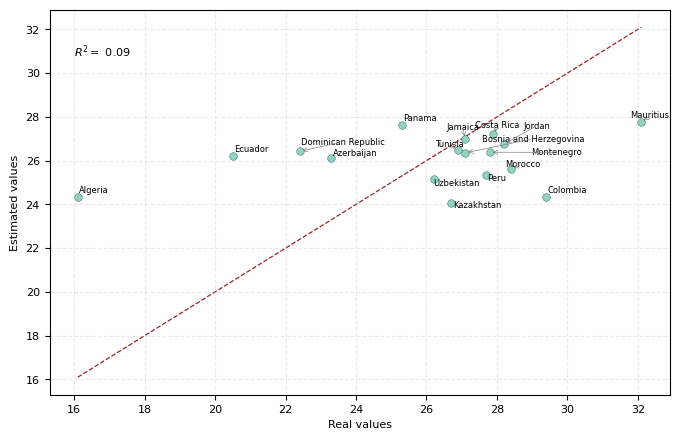

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f8.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(16, 31, r'$R^{2} =$ '+f'{ols_model_f8.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f8.predict(X_leaf)[i],
                    f'{dt_folha8["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f8.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f8.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 9:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((3, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no1['th']       # GDP_per_capita
val_norm[0, 3] = no3['th']       # GHG
val_norm[1, 1] = no5['th']       # SDG
val_norm[2, 1] = no7['th']       # SDG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 10\n----')
print(f"{no0['col']}: <= {no0['th']} ({val_[0, 1]})") # SDG
print(f"{no1['col']}: <= {no1['th']} ({val_[0, 2]})") # GDP_per_capita
print(f"{no3['col']}: <= {no3['th']} ({val_[0, 3]})") # GHG
print(f"{no5['col']}: <= {no5['th']} ({val_[1, 1]})") # SDG
print(f"{no7['col']}: <= {no7['th']} ({val_[2, 1]})") # SDG

Regras Modelo 10
----
SDG: <= 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.28098 (38273.17727862)
GHG: <= 0.02012 (321.99974968210233)
SDG: <= 0.51384 (68.6083845347094)
SDG: <= 0.36772 (63.27597369920614)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 9)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha9 = dt[idx]
dt_folha9_ = dt_folha9.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f9 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 9 — {len(X_leaf)} muestras")
print(ols_model_f9.summary())


📌 Hoja 9 — 22 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     4.239
Date:                Thu, 15 May 2025   Prob (F-statistic):             0.0146
Time:                        20:30:38   Log-Likelihood:                -46.807
No. Observations:                  22   AIC:                             103.6
Df Residuals:                      17   BIC:                             109.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6321      2

In [ ]:
r2_f9 = ols_model_f9.rsquared
r2_f9

np.float64(0.4993489919130122)

In [ ]:
dt_folha9 = merge[merge['Economy'].isin(dt_folha9['Economy'].values)]

In [ ]:
dt_folha9

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
5,Angola,AO,Angola,AO,"MULTIPOLYGON (((2613348.518 -1993799.383, 2592...",0.5,10.3,51.929351,8716.480,67.700756,5.671545
23,Benin,BJ,Benin,BJ,"POLYGON ((304231.065 855057.716, 304149.123 85...",5.8,16.0,56.774325,3823.920,16.699492,1.526287
36,Burkina Faso,BF,Burkina Faso,BF,"POLYGON ((102188.311 1231698.57, 90385.321 123...",3.6,14.5,52.919465,2444.200,34.456815,1.688478
37,Burundi,BI,Burundi,BI,"POLYGON ((3433500.889 -331746.976, 3432784.423...",2.7,12.5,56.077808,873.891,7.049140,0.193696
40,Cameroon,CM,Cameroon,CM,"POLYGON ((1133351.892 241383.142, 1121420.438 ...",4.0,15.3,57.275727,4830.490,39.377189,149.917849
56,Côte d'Ivoire,CI,Côte d'Ivoire,CI,"MULTIPOLYGON (((-594413.663 579405.6, -592194....",2.8,18.2,62.724362,6500.320,32.184005,3.601419
73,Ethiopia,ET,Ethiopia,ET,"POLYGON ((5063856.876 612054.956, 5051062.146 ...",7.2,14.3,55.236871,3409.440,170.033851,4.155879
86,Ghana,GH,Ghana,GH,"POLYGON ((-352664.242 697837.25, -352573.081 6...",2.3,21.3,63.049337,6979.480,48.265926,5.362221
94,Guatemala,GT,Guatemala,GT,"POLYGON ((-9946208.251 1623823.844, -9955921.4...",3.5,15.8,59.405016,12757.080,43.981074,5.562860
96,Guinea,GN,Guinea,GN,"POLYGON ((-884637.819 895544.47, -892658.856 8...",5.7,13.3,56.422082,3745.330,28.634658,1.103381


In [ ]:
dt_folha9['Economy'].values

array(['Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       "Côte d'Ivoire", 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
       'Honduras', 'Kenya', 'Laos', 'Madagascar', 'Mauritania',
       'Mozambique', 'Niger', 'Togo', 'Trinidad and Tobago', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [ ]:
dt_folha9.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,4.031818,16.036364,57.321299,11343.795955,43.043590,18.777003
std,1.648199,2.938342,3.980790,10967.036558,35.329384,40.485492
min,0.500000,10.300000,49.856633,873.891000,7.049140,0.193696
25%,2.975000,13.775000,54.638854,3986.382500,29.097105,1.525481
50%,3.900000,16.000000,57.025026,6536.685000,34.070504,3.324185
75%,5.375000,17.875000,61.223353,12697.280000,43.569329,5.825168
max,7.200000,21.300000,63.049337,37787.300000,170.033851,149.917849


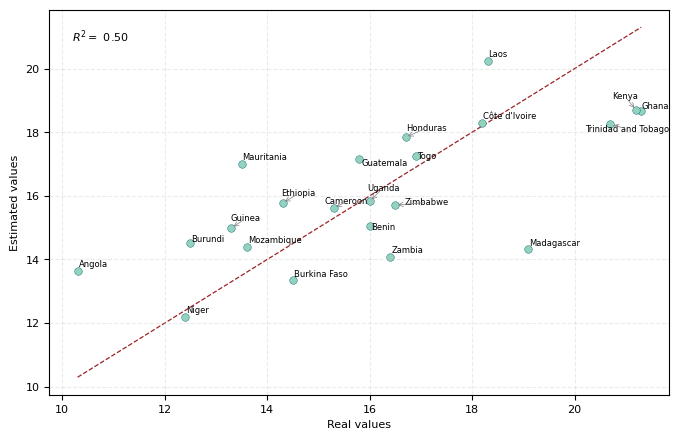

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f9.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(10.2, 21, r'$R^{2} =$ '+f'{ols_model_f9.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f9.predict(X_leaf)[i],
                    f'{dt_folha9["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f9.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f9.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 10:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((3, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no1['th']       # GDP_per_capita
val_norm[0, 3] = no3['th']       # GHG
val_norm[1, 1] = no5['th']       # SDG
val_norm[2, 1] = no7['th']       # SDG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 10\n----')
print(f"{no0['col']}: <= {no0['th']} ({val_[0, 1]})") # SDG
print(f"{no1['col']}: <= {no1['th']} ({val_[0, 2]})") # GDP_per_capita
print(f"{no3['col']}: <= {no3['th']} ({val_[0, 3]})") # GHG
print(f"{no5['col']}: <= {no5['th']} ({val_[1, 1]})") # SDG
print(f"{no7['col']}: > {no7['th']} ({val_[2, 1]})") # SDG

Regras Modelo 10
----
SDG: <= 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.28098 (38273.17727862)
GHG: <= 0.02012 (321.99974968210233)
SDG: <= 0.51384 (68.6083845347094)
SDG: > 0.36772 (63.27597369920614)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 10)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha10 = dt[idx]
dt_folha10_ = dt_folha10.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f10 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 10 — {len(X_leaf)} muestras")
print(ols_model_f10.summary())


📌 Hoja 10 — 13 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1.845
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.214
Time:                        20:30:44   Log-Likelihood:                -29.633
No. Observations:                  13   AIC:                             69.27
Df Residuals:                       8   BIC:                             72.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7898      

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f10 = ols_model_f10.rsquared
r2_f10

np.float64(0.4798392971045369)

In [ ]:
dt_folha10 = merge[merge['Economy'].isin(dt_folha10['Economy'].values)]

In [ ]:
dt_folha10

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
18,Bangladesh,BD,Bangladesh,BD,"MULTIPOLYGON (((10068761.908 2637293.265, 1007...",6.0,20.2,64.345656,8299.93,281.380535,30.957114
26,Bolivia,BO,"Bolivia, Plurinational State of",BO,"POLYGON ((-6923942.728 -2328958.066, -6931803....",2.5,21.4,68.078175,9936.62,55.185653,6.375383
29,Botswana,BW,Botswana,BW,"POLYGON ((2938962.03 -2830598.002, 2937717.278...",3.2,24.6,63.441959,17471.84,12.712755,1.832303
38,Cabo Verde,CV,Cabo Verde,CV,"MULTIPOLYGON (((-2618884.175 1677229.988, -263...",4.8,23.3,68.211000,9624.36,1.231518,5.507217
39,Cambodia,KH,Cambodia,KH,"POLYGON ((11709891.503 1221461.989, 11699767.5...",5.0,20.8,64.898104,6855.15,48.774832,2.713266
68,El Salvador,SV,El Salvador,SV,"POLYGON ((-9762126.333 1553460.07, -9765503.31...",3.5,21.8,68.608396,11305.04,13.051314,2.246250
147,Mongolia,MN,Mongolia,MN,"POLYGON ((12987845.393 5832945.006, 12978242.5...",7.0,28.8,66.312809,27037.39,83.704560,1.627244
153,Namibia,NA,Namibia,NA,"POLYGON ((2226267.393 -2669393.602, 2226328.04...",3.2,21.8,66.540267,4643.10,12.885675,2.189788
159,Nicaragua,NI,Nicaragua,NI,"POLYGON ((-9254195.765 1688391.367, -9261411.2...",4.7,16.9,64.664171,1643.77,20.628271,8.220316
168,Oman,OM,Oman,OM,"MULTIPOLYGON (((6169571.1 2423804.919, 6196722...",1.3,28.4,66.114803,5884.50,127.443021,10.617085


In [ ]:
dt_folha10['Economy'].values

array(['Bangladesh', 'Bolivia', 'Botswana', 'Cabo Verde', 'Cambodia',
       'El Salvador', 'Mongolia', 'Namibia', 'Nicaragua', 'Oman',
       'Paraguay', 'Senegal', 'Tajikistan'], dtype=object)

In [ ]:
dt_folha10.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.469231,22.323077,66.209324,12626.303077,57.608042,6.934129
std,1.872781,3.412270,1.902044,7957.266776,75.638334,7.969446
min,1.300000,16.900000,63.389483,1643.770000,1.231518,1.627244
25%,3.200000,20.800000,64.664171,6855.150000,13.051314,2.246250
50%,4.500000,21.800000,66.312809,9936.620000,28.843732,3.825966
75%,5.000000,23.300000,68.078175,17471.840000,55.185653,8.220316
max,8.300000,28.800000,68.608396,27037.390000,281.380535,30.957114


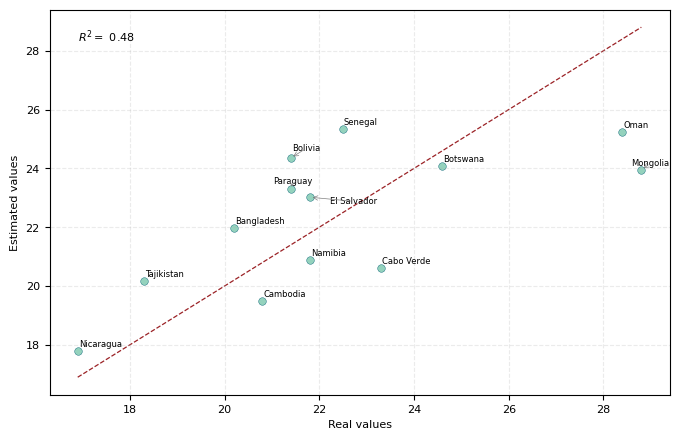

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f10.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(16.9, 28.5, r'$R^{2} =$ '+f'{ols_model_f10.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f10.predict(X_leaf)[i],
                    f'{dt_folha10["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f10.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f10.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 12:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((2, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3), 'Fossil_CO2_emissions' (4)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no2['th']       # GDP_per_capita

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 12\n----')
print(f"{no0['col']}: > {no0['th']} ({val_[0, 1]})")
print(f"{no2['col']}: > {no2['th']} ({val_[0, 2]})")

Regras Modelo 12
----
SDG: > 0.66133 (73.99079128346641)
GDP_per_capita: > 0.34137 (46311.26859603)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 12)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha12 = dt[idx]
dt_folha12_ = dt_folha12.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f12 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 12 — {len(X_leaf)} muestras")
print(ols_model_f12.summary())


📌 Hoja 12 — 20 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9.718
Date:                Thu, 15 May 2025   Prob (F-statistic):           0.000439
Time:                        20:30:55   Log-Likelihood:                -59.191
No. Observations:                  20   AIC:                             128.4
Df Residuals:                      15   BIC:                             133.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6640     1

In [ ]:
r2_f12 = ols_model_f12.rsquared
r2_f12

np.float64(0.7215690506225862)

In [ ]:
dt_folha12 = merge[merge['Economy'].isin(dt_folha12['Economy'].values)]

In [ ]:
dt_folha12

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
12,Australia,AU,Australia,AU,"MULTIPOLYGON (((16869383.931 -2758994.396, 168...",2.1,49.7,76.880000,61180.15,571.839849,104.522926
13,Austria,AT,Austria,AT,"POLYGON ((1165652.677 5921100.999, 1167542.104...",-0.7,53.2,82.540000,64863.40,72.921493,15.987459
21,Belgium,BE,Belgium,BE,"POLYGON ((461890.853 6442531.297, 461666.207 6...",1.5,49.9,80.040000,64004.81,106.370188,22.753405
41,Canada,CA,Canada,CA,"MULTIPOLYGON (((-9688723.272 9735729.723, -969...",1.1,53.8,78.820000,56103.35,747.678027,0.146007
61,Czech Republic,CZ,Czechia,CZ,"POLYGON ((2019923.582 6299500.787, 2020386.981...",6.2,44.8,81.260000,49742.51,114.438416,23.369045
62,Denmark,DK,Denmark,DK,"MULTIPOLYGON (((1069810.72 7438797.541, 106839...",1.8,58.7,84.990000,72271.78,41.831473,7.441261
77,Finland,FI,Finland,FI,"MULTIPOLYGON (((2562273.131 8422307.547, 25651...",-1.0,61.2,86.350000,57268.01,43.453537,8.630459
78,France,FR,France,FR,"MULTIPOLYGON (((198339.953 5246743.398, 193541...",0.9,56.0,82.760000,57558.35,385.520120,74.365671
85,Germany,DE,Germany,DE,"MULTIPOLYGON (((856850.403 6031214.222, 852274...",-0.3,58.8,83.440000,62649.74,681.810328,162.705070
103,Iceland,IS,Iceland,IS,"POLYGON ((-2451781.372 9456940.889, -2451750.1...",4.1,50.7,79.540000,70505.55,4.171936,1.026870


In [ ]:
dt_folha12['Economy'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Italy', 'Lithuania', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Spain', 'Sweden', 'Ukraine'], dtype=object)

In [ ]:
dt_folha12.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.320000,49.665000,80.486283,72817.550500,204.451629,34.566521
std,2.165422,9.075315,3.033391,25933.435827,229.787278,44.783326
min,-3.200000,32.800000,74.806526,47624.700000,4.171936,0.146007
25%,-0.225000,44.875000,78.795000,56976.845000,48.032683,4.264008
50%,1.100000,50.150000,79.790000,63559.470000,89.645840,11.709752
75%,2.350000,56.675000,82.595000,75165.032500,307.568974,63.954883
max,6.200000,64.200000,86.350000,133976.910000,747.678027,162.705070


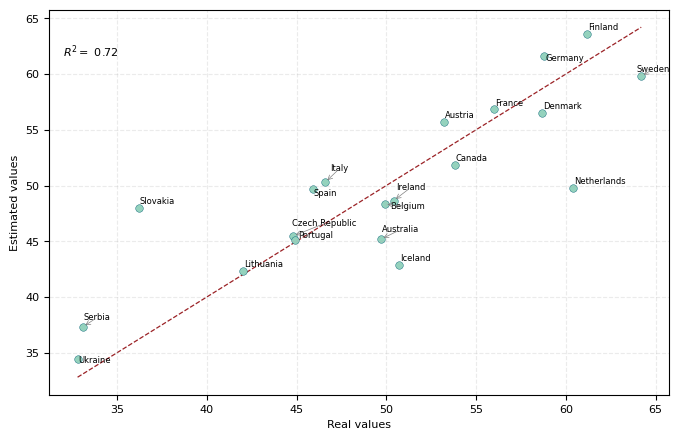

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f12.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(32, 62, r'$R^{2} =$ '+f'{ols_model_f12.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f12.predict(X_leaf)[i],
                    f'{dt_folha12["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f12.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f12.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 13:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((2, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no2['th']       # GDP_per_capita
val_norm[1, 1] = no11['th']      # SDG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 13\n----')
print(f"{no0['col']}: > {no0['th']} ({val_[0, 1]})")
print(f"{no2['col']}: <= {no2['th']} ({val_[0, 2]})")
print(f"{no11['col']}: <= {no11['th']} ({val_[1, 1]})")

Regras Modelo 13
----
SDG: > 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.34137 (46311.26859603)
SDG: <= 0.75283 (77.32993439494018)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 13)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha13 = dt[idx]
dt_folha13_ = dt_folha13.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f13 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 13 — {len(X_leaf)} muestras")
print(ols_model_f13.summary())


📌 Hoja 13 — 13 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     6.238
Date:                Thu, 15 May 2025   Prob (F-statistic):             0.0140
Time:                        20:31:03   Log-Likelihood:                -42.522
No. Observations:                  13   AIC:                             95.04
Df Residuals:                       8   BIC:                             97.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -142.5970     5

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f13 = ols_model_f13.rsquared
r2_f13

np.float64(0.7572213644977954)

In [ ]:
dt_folha13 = merge[merge['Economy'].isin(dt_folha13['Economy'].values)]

In [ ]:
dt_folha13

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
1,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164...",3.3,25.4,75.028501,18037.01,7.673672,1.404006
9,Argentina,AR,Argentina,AR,"MULTIPOLYGON (((-7999325.541 -5014005.892, -79...",-1.6,28.0,74.404641,26432.37,365.684619,53.440493
10,Armenia,AM,Armenia,AM,"MULTIPOLYGON (((5180850.653 4703866.715, 51781...",8.7,28.0,74.093215,19401.00,10.836337,2.076507
35,Bulgaria,BG,Bulgaria,BG,"POLYGON ((2553179.327 5062937.07, 2555439.127 ...",1.8,39.0,75.530000,33212.69,53.372279,9.850872
84,Georgia,GE,Georgia,GE,"POLYGON ((4741201.324 5098086.212, 4737524.789...",7.5,29.9,74.914638,22389.69,19.049154,3.212047
121,Kyrgyzstan,KG,Kyrgyzstan,KG,"POLYGON ((8331709.31 4939450.851, 8330253.031 ...",4.2,20.2,74.194380,6558.81,21.698230,2.770836
130,Luxembourg,LU,Luxembourg,LU,"POLYGON ((707601.357 6364565.204, 708301.681 6...",-1.1,50.6,76.800000,1722.23,7.860933,1.908604
137,Malta,MT,Malta,MT,"POLYGON ((1616327.636 4273136.488, 1605660.229...",5.6,49.1,76.950000,7095.56,2.033865,0.497333
183,Romania,RO,Romania,RO,"POLYGON ((2707257.64 5418615.317, 2705929.939 ...",2.1,34.7,76.690000,40106.52,105.852401,495.612638
211,South Korea,KR,"Korea, Republic of",KR,"MULTIPOLYGON (((14123016.779 4308963.059, 1412...",1.4,58.6,77.330000,15606.04,653.846140,31.580735


In [ ]:
dt_folha13['Economy'].values

array(['Albania', 'Argentina', 'Armenia', 'Bulgaria', 'Georgia',
       'Kyrgyzstan', 'Luxembourg', 'Malta', 'Romania', 'South Korea',
       'Thailand', 'United States', 'Uruguay'], dtype=object)

In [ ]:
dt_folha13.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.823077,38.007692,75.547275,17903.780769,591.625318,149.990517
std,3.049905,13.461331,1.236724,12112.120049,1626.686675,382.314161
min,-1.600000,20.200000,74.093215,1722.230000,2.033865,0.497333
25%,1.400000,28.000000,74.430000,7095.560000,10.836337,2.076507
50%,2.100000,34.700000,75.028501,18037.010000,41.634112,3.212047
75%,4.200000,49.100000,76.800000,26432.370000,365.684619,31.580735
max,8.700000,63.500000,77.330000,40106.520000,5960.804380,1340.445146


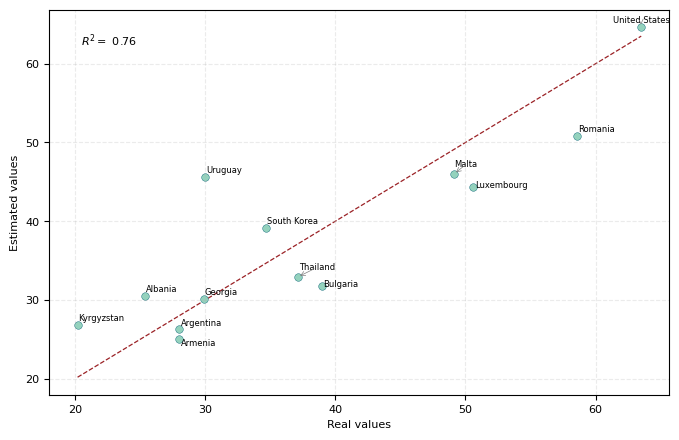

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f13.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(20.5, 63, r'$R^{2} =$ '+f'{ols_model_f13.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f13.predict(X_leaf)[i],
                    f'{dt_folha13["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f13.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f13.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

## **Modelo da folha 14:**

In [ ]:
col_names

Index(['GDP', 'SDG', 'GDP_per_capita', 'GHG'], dtype='object')

In [ ]:
val_norm = np.zeros((2, X.shape[1]))
#'GDP' (0), 'SDG' (1), 'GDP_per_capita' (2), 'GHG' (3)
val_norm[0, 1] = no0['th']       # SDG
val_norm[0, 2] = no2['th']       # GDP_per_capita
val_norm[1, 1] = no11['th']      # SDG

In [ ]:
val_ = scaler.inverse_transform(val_norm)

In [ ]:
print('Regras Modelo 14\n----')
print(f"{no0['col']}: > {no0['th']} ({val_[0, 1]})")
print(f"{no2['col']}: <= {no2['th']} ({val_[0, 2]})")
print(f"{no11['col']}: > {no11['th']} ({val_[1, 1]})")

Regras Modelo 14
----
SDG: > 0.66133 (73.99079128346641)
GDP_per_capita: <= 0.34137 (46311.26859603)
SDG: > 0.75283 (77.32993439494018)


In [ ]:
import statsmodels.api as sm

idx = (leaf_ids == 14)
X_leaf = X[idx]
y_leaf = y[idx]
dt_folha14 = dt[idx]
dt_folha14_ = dt_folha14.copy()

X_leaf = sm.add_constant(X_leaf)
ols_model_f14 = sm.OLS(y_leaf, X_leaf).fit()

print(f"\n📌 Hoja 14 — {len(X_leaf)} muestras")
print(ols_model_f14.summary())


📌 Hoja 14 — 15 muestras
                            OLS Regression Results                            
Dep. Variable:                    GII   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5.091
Date:                Thu, 15 May 2025   Prob (F-statistic):             0.0169
Time:                        20:31:09   Log-Likelihood:                -49.283
No. Observations:                  15   AIC:                             108.6
Df Residuals:                      10   BIC:                             112.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9666     4

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
r2_f14 = ols_model_f14.rsquared
r2_f14

np.float64(0.6706676409244247)

In [ ]:
dt_folha14 = merge[merge['Economy'].isin(dt_folha14['Economy'].values)]

In [ ]:
dt_folha14

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
20,Belarus,BY,Belarus,BY,"POLYGON ((2843842.66 6786058.874, 2831966.873 ...",3.9,26.8,78.595588,27134.48,84.277601,15.417787
46,Chile,CL,Chile,CL,"MULTIPOLYGON (((-8131009.373 -5424344.646, -81...",0.2,33.3,77.819385,29016.80,121.463132,21.093806
57,Croatia,HR,Croatia,HR,"MULTIPOLYGON (((1956832.69 5303425.656, 195019...",2.5,37.1,82.190000,41451.91,25.013482,4.782773
71,Estonia,EE,Estonia,EE,"MULTIPOLYGON (((3118707.621 8284557.732, 31198...",-3.0,53.4,80.460000,42463.51,14.363975,2.734372
89,Greece,GR,Greece,GR,"MULTIPOLYGON (((2346953.847 4729791.475, 23427...",2.0,37.5,78.700000,36084.18,69.266030,15.064466
102,Hungary,HU,Hungary,HU,"POLYGON ((2392190.087 5890733.477, 2388196.719...",-0.9,41.3,79.520000,40510.99,60.926772,10.968929
113,Japan,JP,Japan,JP,"MULTIPOLYGON (((14950138.861 4123744.326, 1494...",1.9,54.6,79.860000,46311.87,1041.012825,269.864826
123,Latvia,LV,Latvia,LV,"POLYGON ((2706731.445 7940440.483, 2707783.835...",-0.3,39.7,80.980000,46068.76,10.957492,1.777535
145,Moldova,MD,"Moldova, Republic of",MD,"POLYGON ((3129004.674 5796756.624, 3132406.047...",1.0,30.3,78.808852,40522.80,13.542412,18.624312
158,New Zealand,NZ,New Zealand,NZ,"MULTIPOLYGON (((18613200.758 -5697053.307, 186...",0.6,46.6,78.810000,7651.82,84.209812,32.387653


In [ ]:
dt_folha14['Economy'].values

array(['Belarus', 'Chile', 'Croatia', 'Estonia', 'Greece', 'Hungary',
       'Japan', 'Latvia', 'Moldova', 'New Zealand', 'Norway', 'Poland',
       'Slovenia', 'Switzerland', 'United Kingdom'], dtype=object)

In [ ]:
dt_folha14.describe()

,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions
count,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000
mean,0.740000,44.08000,80.163588,30620.233333,158.953559,41.210965
std,1.595888,11.66308,1.508627,15553.519482,270.567640,69.501046
min,-3.000000,26.80000,77.819385,3553.410000,10.957492,1.777535
25%,0.150000,37.30000,78.809426,20515.770000,20.503500,6.858813
50%,0.600000,41.30000,79.860000,37445.480000,60.926772,15.417787
75%,1.750000,52.05000,81.515000,41957.710000,102.870367,37.288076
max,3.900000,67.60000,82.230000,46311.870000,1041.012825,269.864826


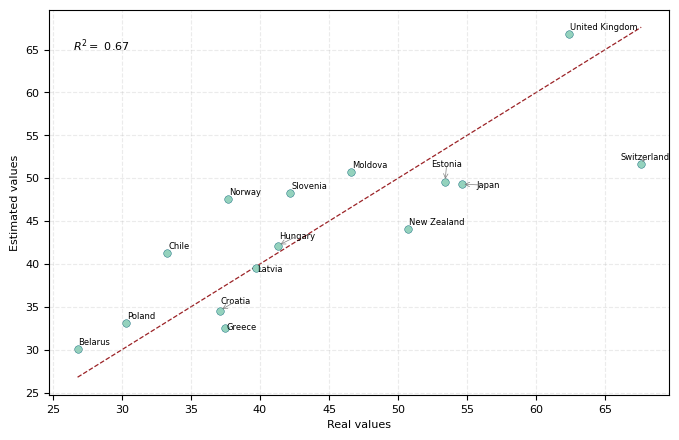

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 8})
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([min(y_leaf), max(y_leaf)], [min(y_leaf), max(y_leaf)], color='#9b2226',
         lw = 0.9, linestyle='--', zorder = 0)
plt.scatter(y_leaf, ols_model_f14.predict(X_leaf), s=30, edgecolor="#005f73",
            c="#94d2bd", lw = 0.3, label="", zorder = 1)
plt.text(26.5, 65.5, r'$R^{2} =$ '+f'{ols_model_f14.rsquared.round(2):.2f}', va='center', ha='left')
plt.xlabel("Real values")
plt.ylabel("Estimated values")

texts = []
for i in range(len(y_leaf)):
    text = plt.text(y_leaf.iloc[i],
                    ols_model_f14.predict(X_leaf)[i],
                    f'{dt_folha14["Economy"].iloc[i]}',
                    fontsize=6, color='black', ha='left', va='bottom')
    texts.append(text)
adjust_text(texts,
            force_text=0.5,
            expand_text=0.5,
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f14.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/scatter_f14.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

In [ ]:
merge['group_mod'] = 'Unanalyzed'
merge.loc[dt_folha4.index, 'group_mod'] = r'Group 1 ($R^{2}$='+f'{r2_f4.round(2)})'
merge.loc[dt_folha6.index, 'group_mod'] = r'Group 2 ($R^{2}$='+f'{r2_f6.round(2)})'
merge.loc[dt_folha8.index, 'group_mod'] = r'Group 3 ($R^{2}$='+f'{r2_f8.round(2)})'
merge.loc[dt_folha9.index, 'group_mod'] = r'Group 4 ($R^{2}$='+f'{r2_f9.round(2)})'
merge.loc[dt_folha10.index, 'group_mod'] = r'Group 5 ($R^{2}$='+f'{r2_f10.round(2)})'
merge.loc[dt_folha12.index, 'group_mod'] = r'Group 6 ($R^{2}$='+f'{r2_f12.round(2)})'
merge.loc[dt_folha13.index, 'group_mod'] = r'Group 7 ($R^{2}$='+f'{r2_f13.round(2)})'
merge.loc[dt_folha14.index, 'group_mod'] = r'Group 8 ($R^{2}$='+f'{r2_f14.round(2)})'
merge.head(3)

,Economy,ISO,COUNTRYAFF,AFF_ISO,geometry,GDP,GII,SDG,GDP_per_capita,GHG,Fossil_CO2_emissions,group_mod
0,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",NaN,NaN,NaN,NaN,NaN,NaN,Unanalyzed
1,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164...",3.3,25.4,75.028501,18037.01,7.673672,1.404006,Group 7 ($R^{2}$=0.76)
2,Algeria,DZ,Algeria,DZ,"POLYGON ((512443.03 4423494.247, 516027.527 44...",4.2,16.1,70.473072,15227.46,256.792131,48.617020,Group 3 ($R^{2}$=0.09)


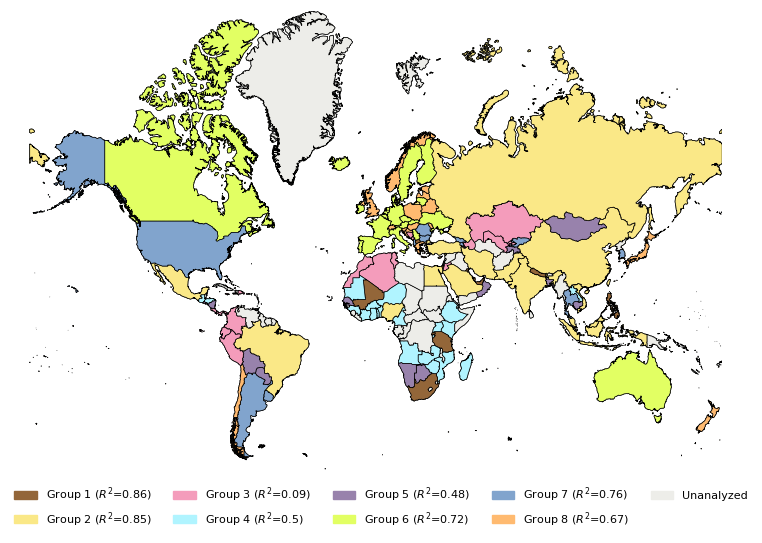

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

colores_hex = ["#936639",  # Pastel rojo
               "#fae887",  # Pastel amarillo
               "#f49cbb",  # Pastel  rosado
               "#b0f4ff",  # Pastel celeste
               "#9882ac",   # Pastel lavanda
               "#e2ff63",  # Pastel verde claro
               "#81a4cd",  # Pastel azul
               "#ffba70",  # Pastel melocotón
               '#edede9']
cmap= ListedColormap(colores_hex)

fig, ax = plt.subplots(figsize=(22, 6))
merge.plot(ax=ax, color='#edede9', edgecolor='black', linewidth=0.5)
gii_plot = merge.plot(column='group_mod', ax=ax, legend=False, cmap=cmap,
                     edgecolor='black',categorical=True,linewidth=0.5)


labels = sorted(merge['group_mod'].unique())
handles = [
    mpatches.Patch(color=colores_hex[i], label=labels[i])
    for i in range(len(labels))
]

# Añadir leyenda manualmente abajo en 4 columnas
legend = fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.515, -0.001),
                    ncol=5, frameon=False, fontsize=8, title='')

plt.xlim([lim[0]-30000, lim[2]+3000])
plt.ylim([lim[1]+22000000, lim[3]+80000])
plt.axis('off')

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/Classification.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/Classification.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

In [ ]:
df_plot = pd.DataFrame({'reais': y.values, 'calculados': y_pred})
df_plot.loc[dt_folha4_.index, 'group_mod'] = r'Group 1 ($R^{2}$='+f'{r2_f4.round(2)})'
df_plot.loc[dt_folha6_.index, 'group_mod'] = r'Group 2 ($R^{2}$='+f'{r2_f6.round(2)})'
df_plot.loc[dt_folha8_.index, 'group_mod'] = r'Group 3 ($R^{2}$='+f'{r2_f8.round(2)})'
df_plot.loc[dt_folha9_.index, 'group_mod'] = r'Group 4 ($R^{2}$='+f'{r2_f9.round(2)})'
df_plot.loc[dt_folha10_.index, 'group_mod'] = r'Group 5 ($R^{2}$='+f'{r2_f10.round(2)})'
df_plot.loc[dt_folha12_.index, 'group_mod'] = r'Group 6 ($R^{2}$='+f'{r2_f12.round(2)})'
df_plot.loc[dt_folha13_.index, 'group_mod'] = r'Group 7 ($R^{2}$='+f'{r2_f13.round(2)})'
df_plot.loc[dt_folha14_.index, 'group_mod'] = r'Group 8 ($R^{2}$='+f'{r2_f14.round(2)})'
df_plot.head(3)

,reais,calculados,group_mod
0,25.4,30.568329,Group 7 ($R^{2}$=0.76)
1,16.1,24.326206,Group 3 ($R^{2}$=0.09)
2,10.3,13.635059,Group 4 ($R^{2}$=0.5)


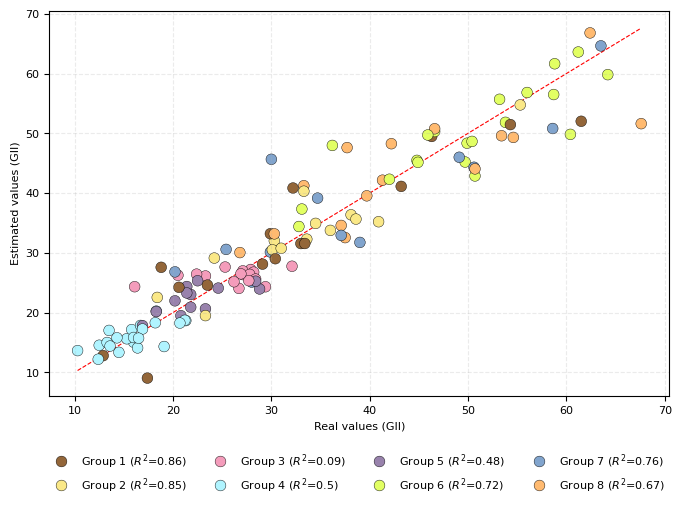

In [ ]:
sorted_groups = sorted(df_plot['group_mod'].unique())

fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
plt.plot([df_plot['reais'].min(), df_plot['reais'].max()],
         [df_plot['reais'].min(), df_plot['reais'].max()],
         linestyle='--', color='red', label='', linewidth=0.8, zorder = 1)
sns.scatterplot(data=df_plot, x='reais', y='calculados',
                hue='group_mod', edgecolor='black', s=60,
                palette=dict(zip(sorted_groups, colores_hex)),
                linewidth=0.3)

plt.xlabel("Real values (GII)")
plt.ylabel("Estimated values (GII)")

handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])
handles, labels = zip(*sorted_handles_labels)

plt.legend(handles, labels, loc='upper left',
           bbox_to_anchor=(-0.015, -0.12), ncol=4,
           frameon=False, fontsize=8, title='')

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/disp.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/disp.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

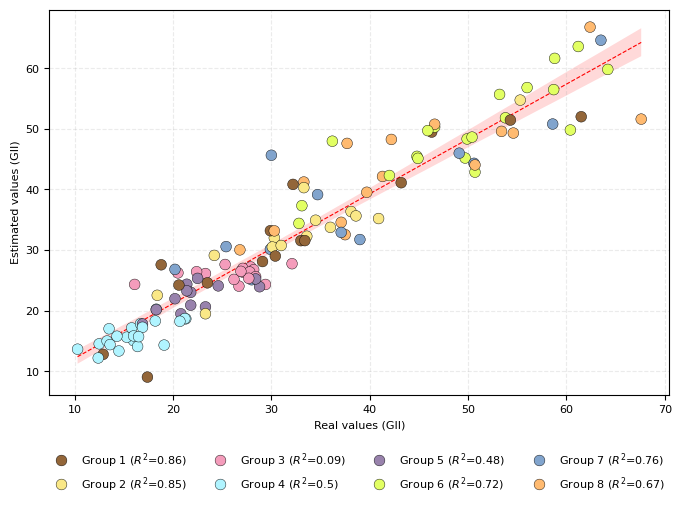

In [ ]:
sorted_groups = sorted(df_plot['group_mod'].unique())

fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder = 0)
#plt.plot([df_plot['reais'].min(), df_plot['reais'].max()],
#         [df_plot['reais'].min(), df_plot['reais'].max()],
#         linestyle='--', color='red', label='', linewidth=0.8)
sns.regplot(data=df_plot, x='reais', y='calculados',
            scatter=False, ci=95, ax=ax,
            line_kws={'color': 'red', 'linewidth': 0.8, 'linestyle':'--'})

sns.scatterplot(data=df_plot, x='reais', y='calculados',
                hue='group_mod', edgecolor='black', s=60,
                palette=dict(zip(sorted_groups, colores_hex)),
                linewidth=0.3, zorder = 4)

plt.xlabel("Real values (GII)")
plt.ylabel("Estimated values (GII)")

handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])
handles, labels = zip(*sorted_handles_labels)

plt.legend(handles, labels, loc='upper left',
           bbox_to_anchor=(-0.015, -0.12), ncol=4,
           frameon=False, fontsize=8, title='')

plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/disp_inter.png", dpi=800, bbox_inches='tight',pad_inches=0)
plt.savefig("/content/gdrive/MyDrive/Analisis Diversos/Dados PUCP/Artigo 1 - Complex/Figuras/disp_inter.pdf", dpi=800, bbox_inches='tight',pad_inches=0)
plt.show()

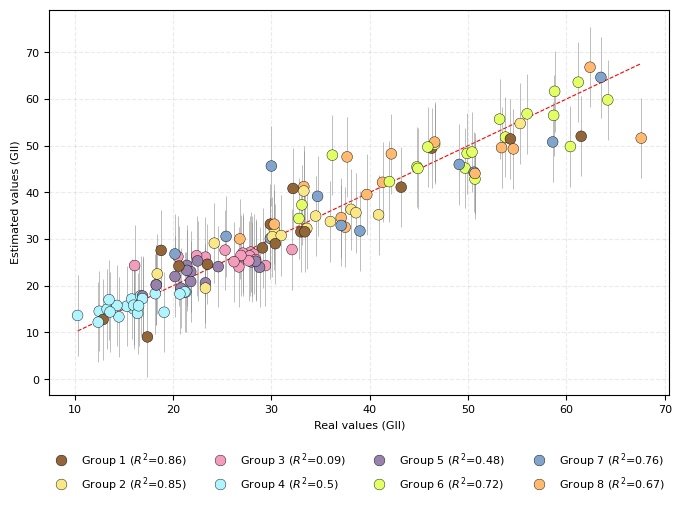

In [ ]:
import numpy as np

df_plot['residuo'] = df_plot['calculados'] - df_plot['reais']
erro_std = np.std(df_plot['residuo'])
df_plot['ci'] = 1.96 * erro_std


sorted_groups = sorted(df_plot['group_mod'].unique())

fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True, axis='both', linestyle='--', alpha=0.25, zorder=0)

# Linha de referência (y = x)
plt.plot([df_plot['reais'].min(), df_plot['reais'].max()],
         [df_plot['reais'].min(), df_plot['reais'].max()],
         linestyle='--', color='red', linewidth=0.8, zorder=1)

# Gráfico de dispersão
sns.scatterplot(data=df_plot, x='reais', y='calculados',
                hue='group_mod', edgecolor='black', s=60,
                palette=dict(zip(sorted_groups, colores_hex)),
                linewidth=0.3, zorder=2)

# Adiciona barras de erro (intervalo de confiança)
plt.errorbar(df_plot['reais'], df_plot['calculados'],
             yerr=df_plot['ci'],
             fmt='none', ecolor='gray', elinewidth=0.6, alpha=0.6, zorder=1)

plt.xlabel("Real values (GII)")
plt.ylabel("Estimated values (GII)")

# Legenda ordenada
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])
handles, labels = zip(*sorted_handles_labels)

plt.legend(handles, labels, loc='upper left',
           bbox_to_anchor=(-0.015, -0.12), ncol=4,
           frameon=False, fontsize=8, title='')